# Trabajo Práctico N°06 - Transformada de Laplace
Previamente, vimos que la transformada de fourier nos sirve para transformar señales desde el dominio de configuración (tiempo o espacio), al dominio de la frecuencia. Teniendo una señal $x(t)$ y aplicándole la F.T. 

$$X(\omega)=\int_{-\infty}^{\infty}x(t)\;e^{-j\omega t}\;dt$$

![fourier_transform](img/08-fourier_transform.png)

Teniendo en cuenta que las soluciones para los distintos tipos de Ecuaciones Diferenciales pueden ser de dos tipos: 

* Exponenciales: $e^{at} \implies {\partial e^{at}\over \partial t} = ae^{at}$ 
* Senoidales: $\sin(at) \implies {\partial^2 sin(at)\over \partial t^2} = a^2 \sin(at)$ 

Si analizamos la transformada de fourier, podemos apreciar que el análisis de la señal se realiza en términos de sinusoides:

![fourier_sinusoide](img/08-fourier_sinusoide.png)

El cual es procedimiento común para pasar funciones en el dominio del tiempo al dominio de la frecuencia. 

/home/ezequiel/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


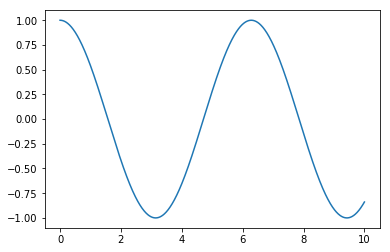

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,10,1000)
y = np.exp(complex(0, -1)*x)

plt.plot(x,y)
plt.show()

El problema es que transformar señales desde el dominio del tiempo al dominio de la frecuencia es un poco restrictivo cuando estamos trabajando con Ecuaciones Diferenciales. 

Ahora, que sucede si en ves de solo pensar en realizar transformaciones en base a sinusoides, también utilizamos exponenciales. Si realizamos la transformada de fourier de la siguiente manera: 

$$X(\sigma,\omega)=\int_{-\infty}^{\infty}[x(t)\;e^{-\sigma t}]\;e^{-j\omega t}\;dt$$

Si combinamos estos dos términos $e^{-\sigma t}\cdot e^{-j\omega t}=e^{(-\sigma-j\omega)t}=e^{st}$, tenemos una variable compleja en la que su parte real, corresponde con respuestas exponenciales, y una parte imaginaria, que corresponde con respuestas sinusoidales. 
Remplazando $-\sigma-j\omega = s$, nuestra transformada queda con la forma: 

$$X(s)=\int_{-\infty}^{\infty}x(t)\;e^{st}\;dt$$

La cual es la forma estándar de la transformada de Laplace. 

La cual implicaria, graficamente hablando, realizar lo siguiente:

![transformada_laplace_graficamente](img/08-transformada_laplace_graficamente.png)

## Resolución Simbólica de la Transformada de Laplace en Python
SymPy tiene implementados métodos para utilizar la transformada de laplace, analíticamente, en python. 

Para realizar la transformada, en este caso de la función $f(t)=t^2$:

In [25]:
from sympy.integrals import laplace_transform
from sympy.abc import s, a
from sympy import Symbol

t = Symbol('t', positive=True)

F,a,cond = laplace_transform(t**2, t, s)
print(F)
print(a)
print(cond)

2/s**3
-oo
0 < re(s)


## Ejercicios
1. Hallar la transformada de Laplace de las siguientes funciones en forma analítica
    1. $f(t)=sen(at)$
    2. $f(t)=cos(4t)$
    3. $f(t)=2\exp(-2t)$
    4. $f(t)=5t^2$
2. Hallar la transformada de Laplace de cada una de las siguientes funciones haciendo uso de las tablas de Transformadas.
    1. $f(t)=5t-3$
    2. $f(t)=6sen(2t)-5cos(2t)$
    3. $f(t)=2t^2-e^{-t}$
    4. $f(t)=3cos(5t)$
    5. $f(t)=(t^2+1)^2$
    6. $f(t)=(5e^{2t}-3)^2$
3. Hallar la transformada de Laplace de cada una de las funciones indicando las propiedades que pueden utilizarse para llegar al resultado.
    1. $f(t)=t^3e^{-3t}$
    2. $f(t)=e^{-t}cos(2t)$
    3. $f(t)=2e^{3t}sen(4t)$
    4. $f(t)=(t+2)^2e^t$
    5. $f(t)=e^{2t}[3sen(4t)-4cos(4t)]$
    6. $f(t)=4te^{-2t}cosh(5t)$
4. Hallar la transformada Inversa de Laplace haciendo uso de la tabla de antitransformadas.
    1. $F(s)=\frac{1}{s^4}$
    2. $F(s)=\frac{6s}{s^2-16}$
    3. $F(s)=\frac{1}{s-a}$
    4. $F(s)=\frac{1}{s^2+4^2}$
5. Hallar la transformada Inversa de Laplace mediante el método de descomposición en fracciones simples.
    1. $F(s)=\frac{3s+7}{s^2-2s-3}$
    2. $F(s)=\frac{5s^2-15s-11}{(s^2-s+2)(s^2+4s+4)}$
    3. $F(s)=\frac{2s-1}{s^3-s}$
    4. $F(s)=\frac{3s+1}{(s-1)(s^2+1)}$
6. Resolver las siguientes ecuaciones diferenciales por medio de la transformada de Laplace.
    1. $f''(t)-3f'(t)+2f(t)=4e^{2t}\qquad$ para $f(0)=-3$ y $f'(0)=5$
    2. $f''(t)+f'(t)=t\qquad$ para $f(0)=1$ y $f'(0)=-2$
    3. $f''(t)-6f'(t)+8f(t)=1\qquad$ para $f(0)=-2$ y $f'(0)=1$
    4. $f''(t)-4f'(t)=senh(2t)\qquad$ para $f(0)=3$ y $f'(0)=0$